# COMPANY :  Innovation.Creation [IC Solutions]

# TASK : Prediction Using Supervised Learning

# TOPIC : Loan Prediction Approval

# Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [149]:
data = pd.read_csv("classified-data.csv")

In [150]:
data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


# Gathering the Data Information 

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

# Number of Rows and Columns

In [152]:
data.shape

(30000, 24)

# Data Type

In [153]:
type(data)

pandas.core.frame.DataFrame

# Statistical measures

In [154]:
data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000




# Number of missing values in each column

In [155]:
data.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

# Dropping missing values

In [156]:
data = data.dropna()


In [157]:
data.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

# Dependent Column Values

In [158]:
data ['Dependents'].value_counts()

2.0     6922
3.0     3426
1.0     2766
4.0     1668
5.0      230
6.0       32
7.0        4
10.0       1
14.0       1
Name: Dependents, dtype: int64

In [159]:
data ['Has Active Credit Card'].value_counts()

Active         5231
Inactive       4940
Unpossessed    4879
Name: Has Active Credit Card, dtype: int64

In [160]:
data ['No. of Defaults'].value_counts()

0    12124
1     2926
Name: No. of Defaults, dtype: int64

In [161]:
data ['Credit Score'].value_counts()

792.76    7
726.79    5
737.45    5
674.37    5
667.26    5
         ..
845.74    1
882.65    1
731.25    1
649.43    1
657.32    1
Name: Credit Score, Length: 11488, dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='Profession', ylabel='count'>

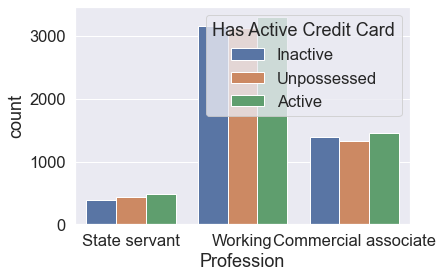

In [162]:
sns.countplot(x='Profession', hue='Has Active Credit Card',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

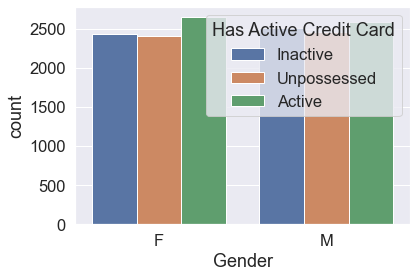

In [163]:
sns.countplot(x='Gender', hue='Has Active Credit Card',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

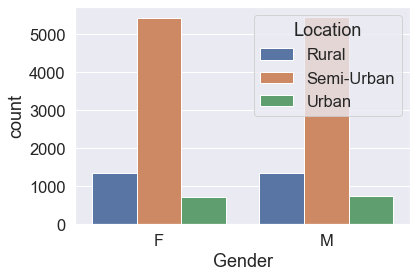

In [164]:
sns.countplot(x='Gender', hue='Location',data=data)

<AxesSubplot:xlabel='Profession', ylabel='count'>

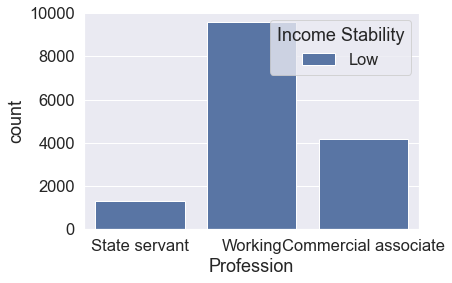

In [165]:
sns.countplot(x='Profession', hue='Income Stability',data=data)

<AxesSubplot:xlabel='Profession', ylabel='count'>

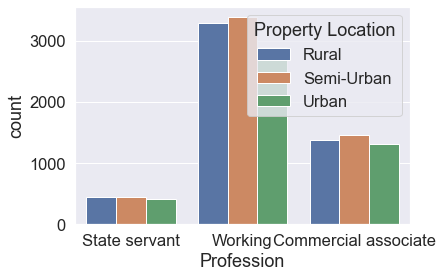

In [166]:
sns.countplot(x='Profession', hue='Property Location',data=data)

<AxesSubplot:xlabel='Type of Employment', ylabel='count'>

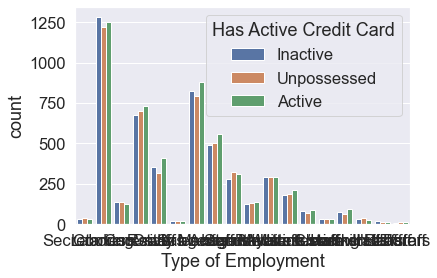

In [167]:
sns.countplot(x='Type of Employment', hue='Has Active Credit Card',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

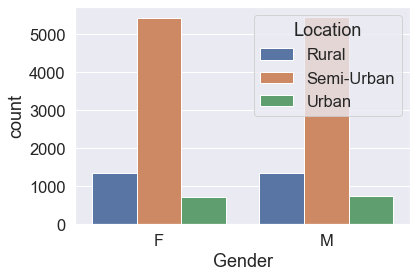

In [168]:
sns.countplot(x='Gender', hue='Location',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

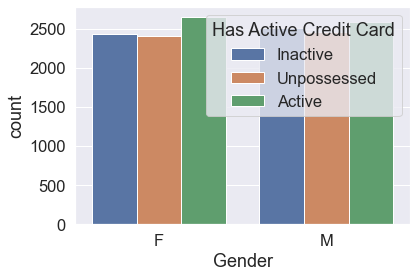

In [169]:
sns.countplot(x='Gender',hue='Has Active Credit Card',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

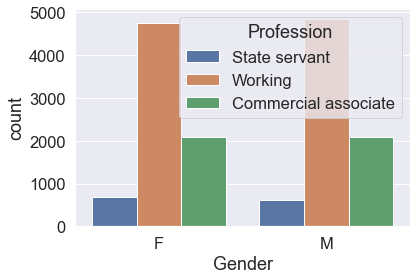

In [170]:
sns.countplot(x='Gender',hue='Profession',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

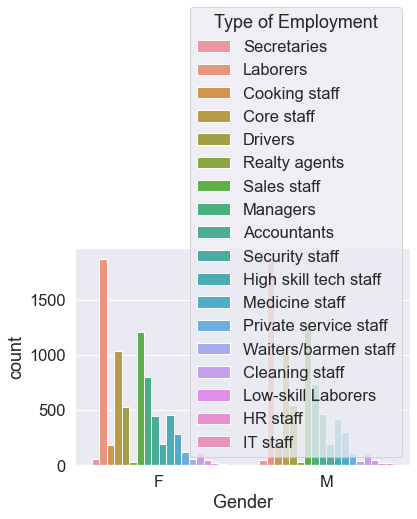

In [171]:
sns.countplot(x='Gender',hue='Type of Employment',data=data)

<AxesSubplot:xlabel='Profession', ylabel='count'>

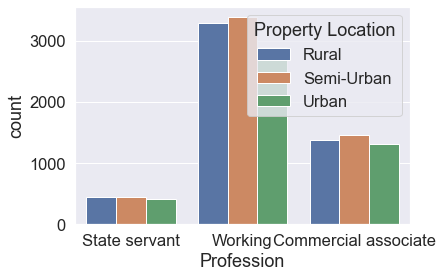

In [172]:
sns.countplot(x='Profession',hue='Property Location',data=data)

<AxesSubplot:xlabel='Age', ylabel='count'>

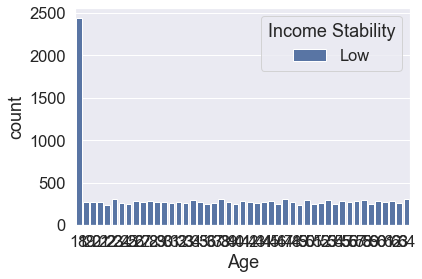

In [173]:
sns.countplot(x='Age',hue='Income Stability',data=data)

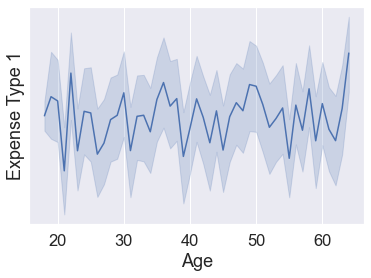

In [174]:
ax=sns.lineplot(x='Age', y='Expense Type 1', data=data)

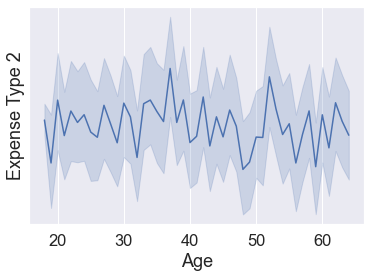

In [175]:
ax=sns.lineplot(x='Age', y='Expense Type 2', data=data)

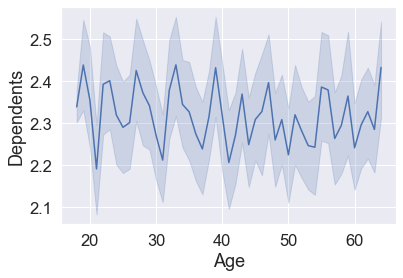

In [176]:
ax=sns.lineplot(x='Age', y='Dependents', data=data)

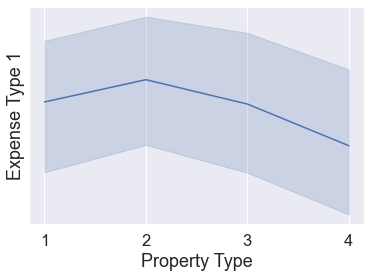

In [177]:
ax=sns.lineplot(x='Property Type', y='Expense Type 1', data=data)

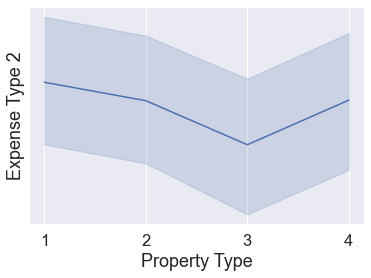

In [178]:
ax=sns.lineplot(x='Property Type', y='Expense Type 2', data=data)

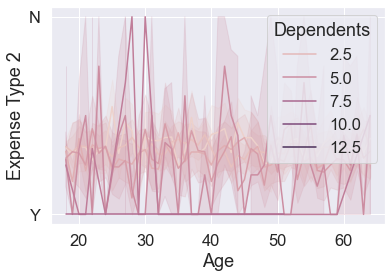

In [179]:
ax=sns.lineplot(x='Age', y='Expense Type 2',hue='Dependents', data=data)

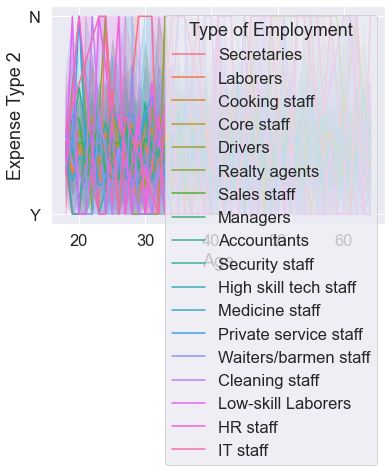

In [180]:
ax=sns.lineplot(x='Age', y='Expense Type 2',hue='Type of Employment', data=data)

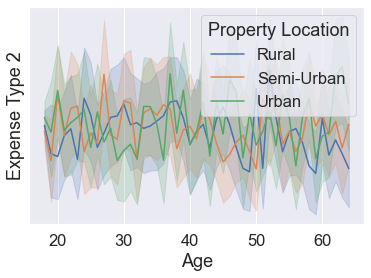

In [181]:
ax=sns.lineplot(x='Age', y='Expense Type 2',hue='Property Location', data=data)

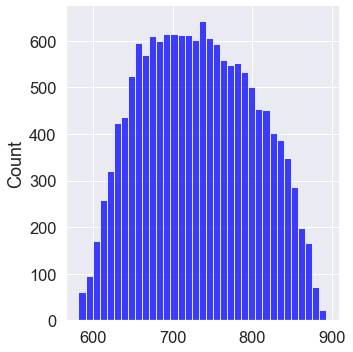

In [182]:
x = data['Credit Score'].values
sns.displot(x, color = 'blue')

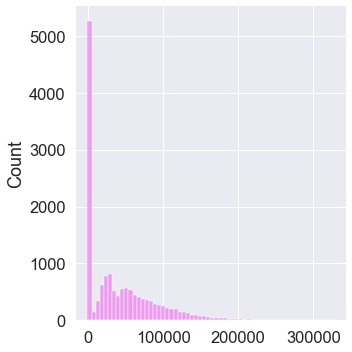

In [183]:
x = data['Loan Sanction Amount (USD)'].values
sns.displot(x, color = 'violet')

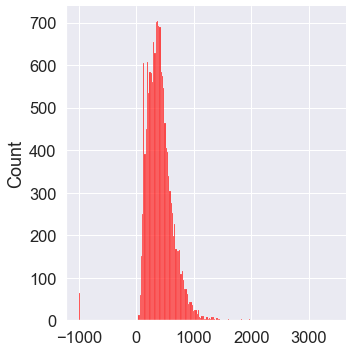

In [184]:
x = data['Current Loan Expenses (USD)'].values
sns.displot(x, color = 'red')

the median is: 379.96000000000004


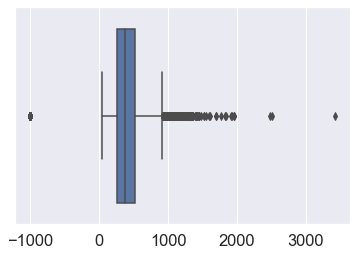

In [185]:
x = data['Current Loan Expenses (USD)'].values
ax = sns.boxplot(x)
print('the median is:', data['Current Loan Expenses (USD)'].median())

the median is: 730.02


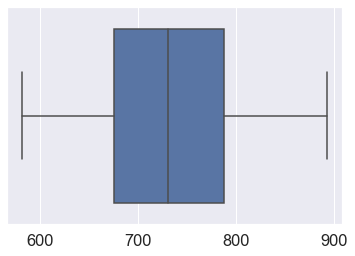

In [186]:
x = data['Credit Score'].values
ax = sns.boxplot(x)
print('the median is:', data['Credit Score'].median())

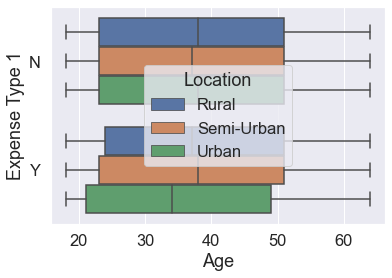

In [187]:
ax = sns.boxplot(x='Age',y='Expense Type 1',hue='Location',data=data)

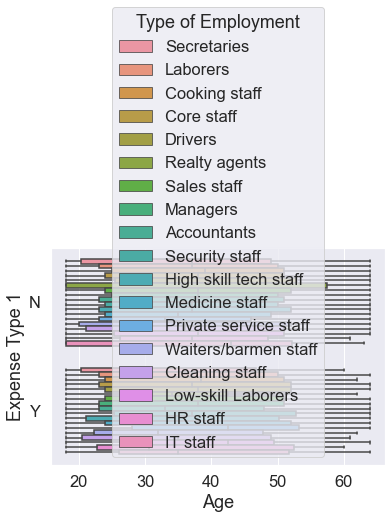

In [188]:
ax = sns.boxplot(x='Age',y='Expense Type 1',hue='Type of Employment',data=data)

# CONVERT CATEGORICAL COLUMNS TO NUMERICAL VALUES

In [189]:
data.replace({'Income Stability':{'Low':0,'High':1} ,'Profession':{'Working':0,'Pensioner':1,'State servant':2},'Gender':{'F':1,'M':0},'Type of Employment':{'Secretaries':0,'Laborers':1,'Cooking staff':2,'Core staff':3}, 'Location':{'Rural':0,'Semi-Urban':1}, 'Expense Type 1':{'N':0,'Y':1}, 'Expense Type 2':{'N':0,'Y':1}, 'Has Active Credit Card':{'Inactive':0,'Unpossessed':1,'Active':2}, 'Property Location':{'Rural':0,'Semi-Urban':1,'Urban':2}},inplace=True)

In [190]:
data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
5,C-17688,Polly Crumpler,1,60,1234.92,0,2,0,0,34434.72,...,684.12,1,0,491,1234.92,2,0,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,0,43,2361.56,0,0,1,1,152561.34,...,637.29,0,1,227,2361.56,1,1,1,221050.80,0.00
8,C-26934,Kenny Ankrom,1,38,1296.07,0,0,2,0,35141.99,...,705.29,1,2,241,1296.07,4,0,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,0,18,1546.17,0,0,1,0,42091.29,...,613.24,0,1,883,1546.17,2,2,1,67993.43,0.00
10,C-40801,Laree Staton,0,18,2416.86,0,2,3,1,25765.72,...,652.41,0,2,325,2416.86,2,0,1,32423.71,16747.72


In [191]:
data.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

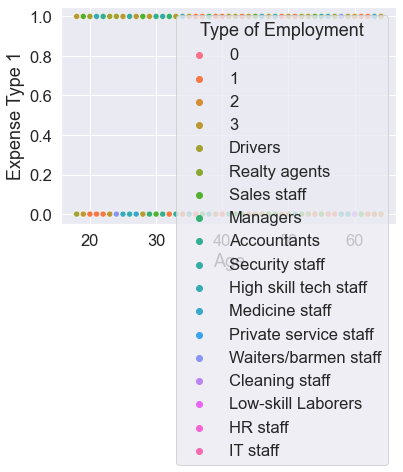

In [192]:
ax = sns.scatterplot(x='Age' ,y='Expense Type 1' ,hue ='Type of Employment' ,data=data)

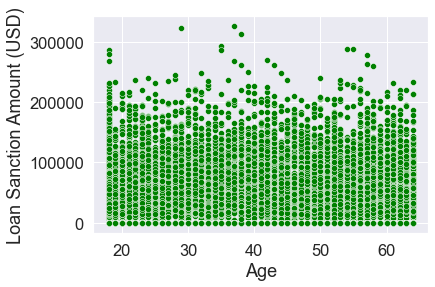

In [193]:
ax = sns.scatterplot(x="Age" , y="Loan Sanction Amount (USD)", data=data, color = 'green')

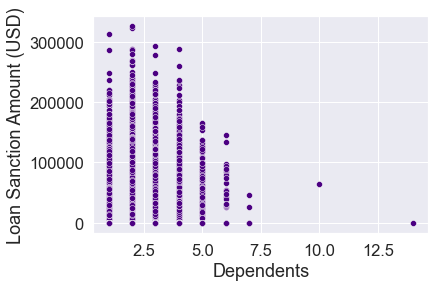

In [194]:
ax = sns.scatterplot(x="Dependents" , y="Loan Sanction Amount (USD)", data=data, color = 'indigo')

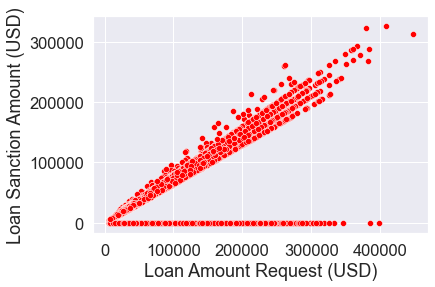

In [195]:
ax = sns.scatterplot(x="Loan Amount Request (USD)" , y="Loan Sanction Amount (USD)", data=data, color = 'red')

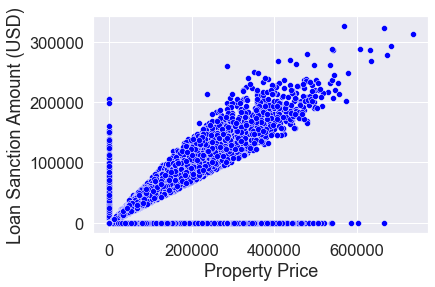

In [196]:
ax = sns.scatterplot(x="Property Price" , y="Loan Sanction Amount (USD)", data=data, color = 'blue')

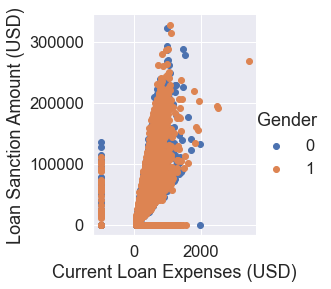

In [197]:
# Using SCATTER REPRESENTATION
# Imported libraries... x-axis: loan_status, y_axis: Loan_Amount and representing in terms of Gender_Section

sns.FacetGrid(data,hue="Gender",size=4) \
.map(plt.scatter,"Current Loan Expenses (USD)","Loan Sanction Amount (USD)") \
.add_legend()
plt.show()

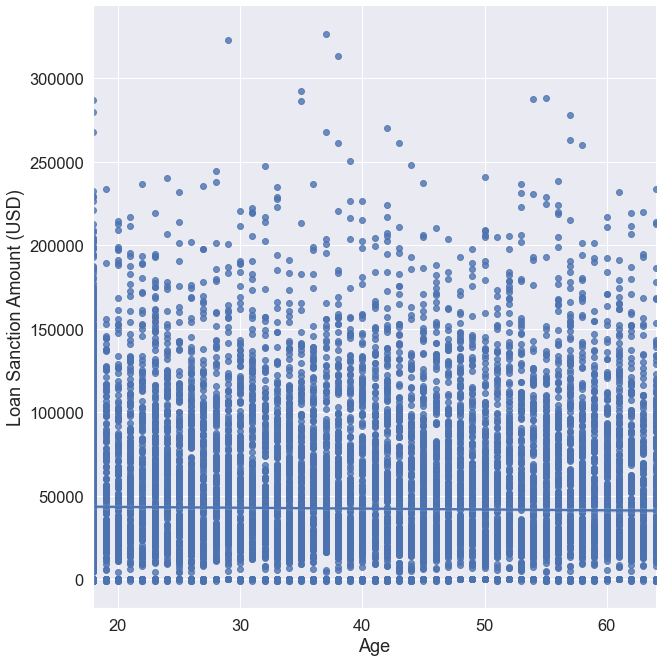

In [198]:
ax = sns.lmplot(x="Age" , y="Loan Sanction Amount (USD)", data=data, height=9)

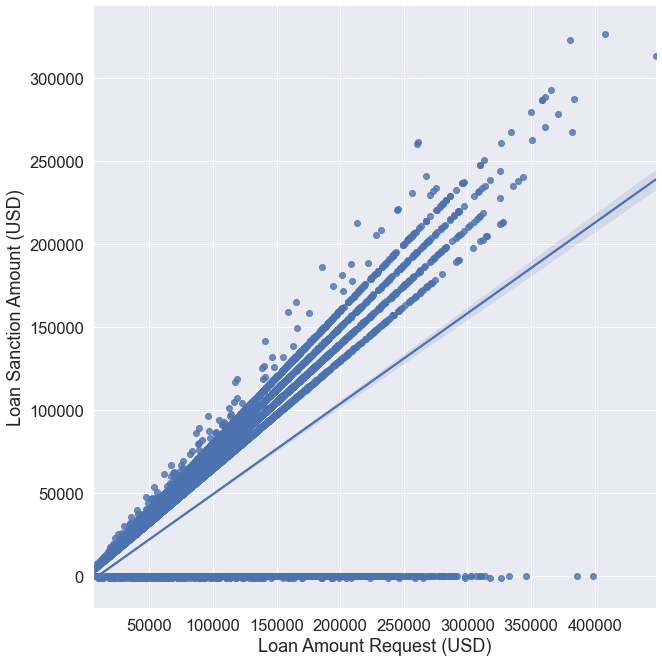

In [199]:
ax = sns.lmplot(x="Loan Amount Request (USD)" , y="Loan Sanction Amount (USD)", data=data, height=9)

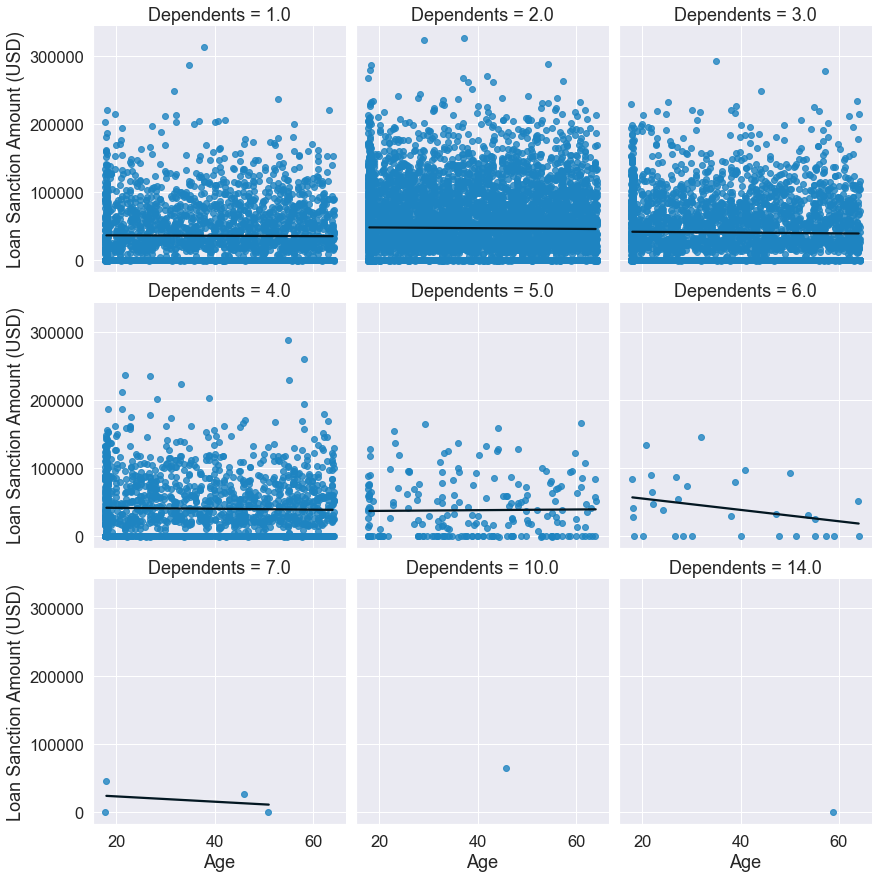

In [200]:
ax = sns.lmplot(x="Age" , y="Loan Sanction Amount (USD)", data=data, col = 'Dependents', ci= False, height=4,
               line_kws={'color': '#031722'},
               scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

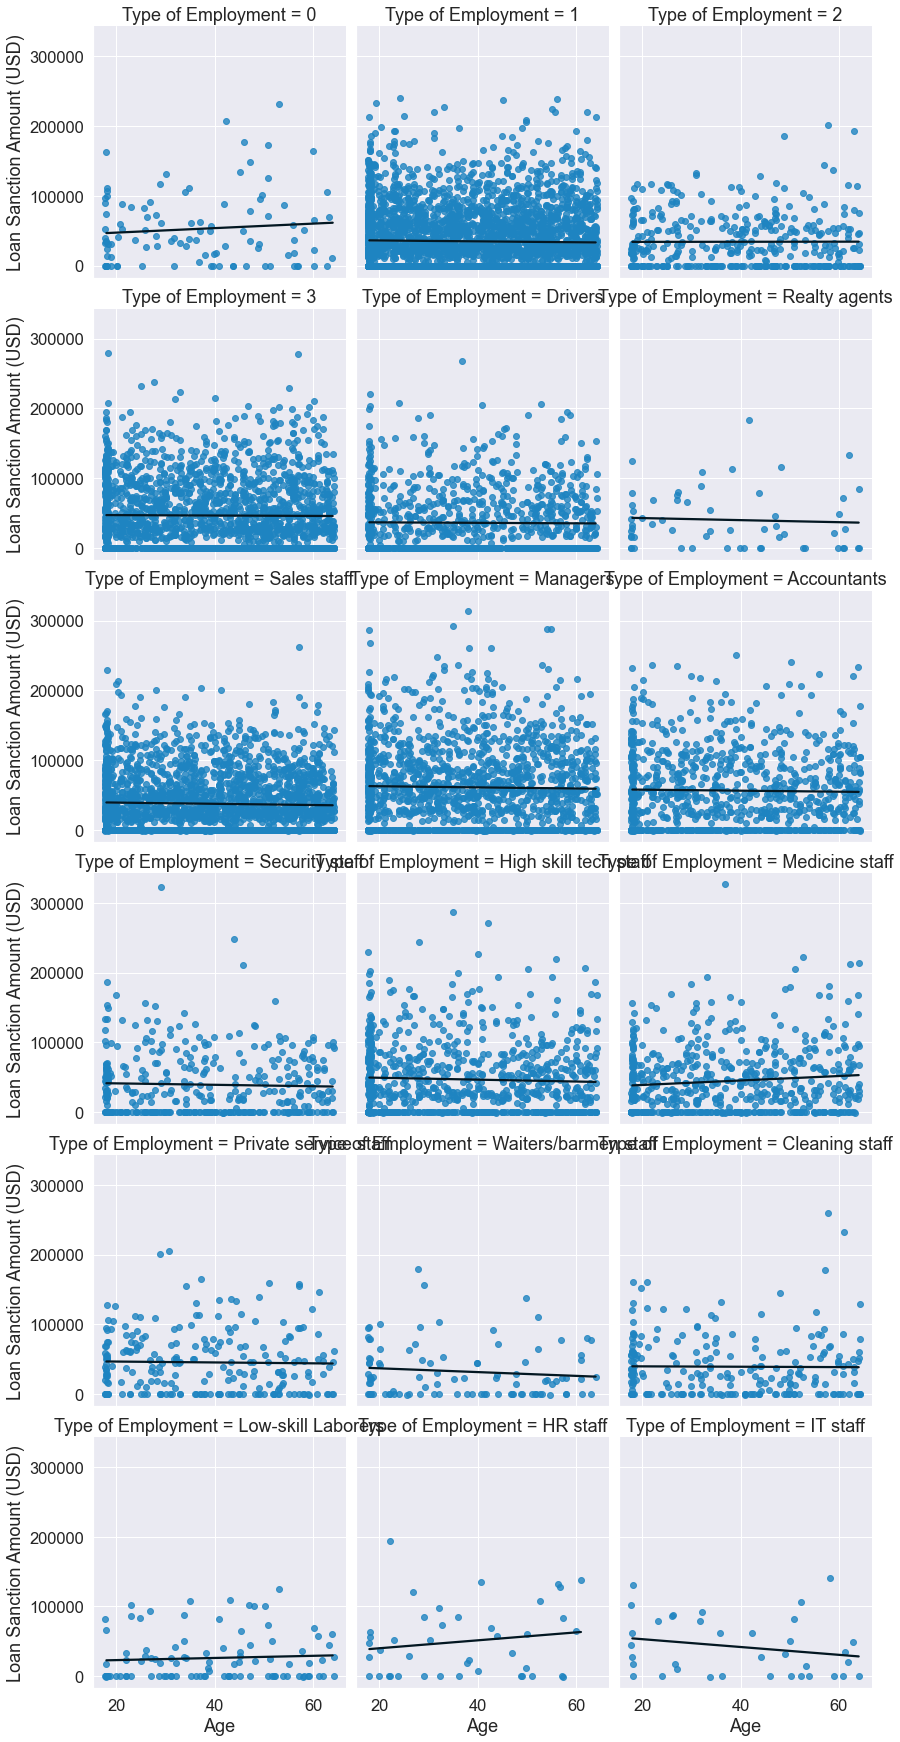

In [201]:
ax = sns.lmplot(x="Age" , y="Loan Sanction Amount (USD)", data=data, col = 'Type of Employment', ci= False, height=4,
               line_kws={'color': '#031722'},
               scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

In [202]:
exp_vals = [56,1933,241,809,1933]
exp_labels = ['Age' , 'Income (USD)','Current Loan Expenses (USD)','Credit Score','Property Age']

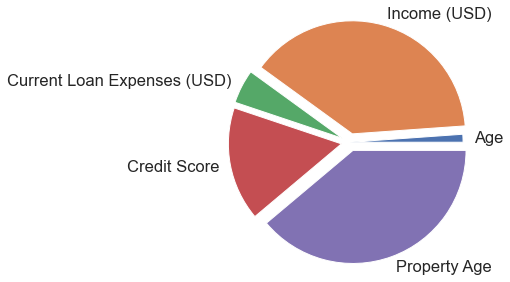

In [203]:
plt.pie(exp_vals,labels=exp_labels,radius=1.3,explode=[0,0.1,0.1,0.1,0.1])
plt.show()

Text(0, 0.5, 'Count')

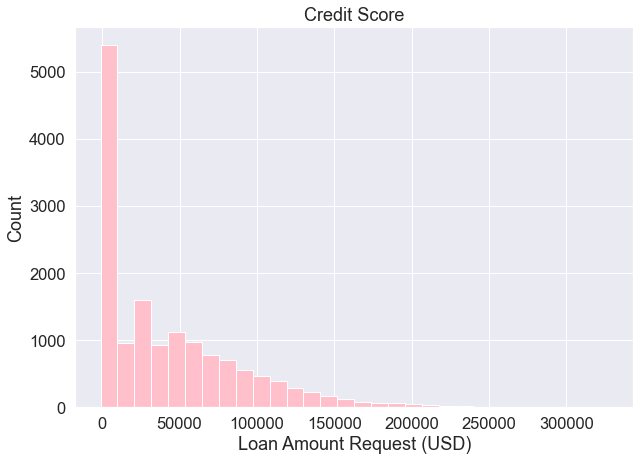

In [204]:
# Using HISTOGRAM REPRESENTATION
# x-axis: loan figures, y_axis: count, Title: Loan taken by Customers

plt.figure(figsize = (10,7)) 
x = data["Loan Sanction Amount (USD)"] 
plt.hist(x, bins = 30, color = "pink") 
plt.title("Credit Score") 
plt.xlabel("Loan Amount Request (USD)") 
plt.ylabel("Count")

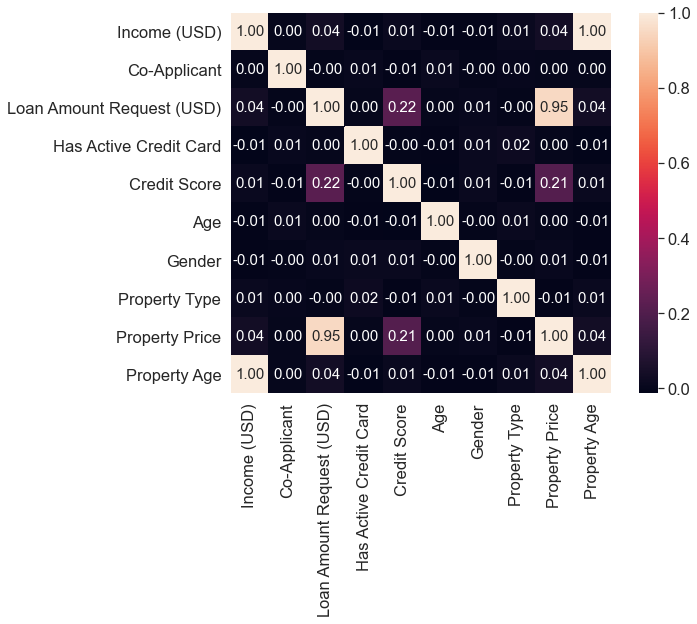

In [205]:
# Correlation Matrix of the columns given below

cols = ['Income (USD)','Co-Applicant','Loan Amount Request (USD)','Has Active Credit Card','Credit Score','Age',
        'Gender','Property Type','Property Price','Property Age']
f, ax = plt.subplots(figsize=(10, 7))
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

# MODEL BUILDING [Regression Algorithm]

#  The Approach we are going to use here is to split available data in two sets

   # 1. Training : We will train our model on this dataset
   # 2. Testing : We will use this subset to make actual predictions using trained model

# MODEL 1 : Logistic Regression Model

In [206]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [207]:
X=data[['Gender','Age','Dependents','Credit Score','Property Type','Property Age','Property Price','Property ID','Property Location','Expense Type 2','Has Active Credit Card',

'Co-Applicant','Income (USD)','Loan Amount Request (USD)','Loan Sanction Amount (USD)',
'Current Loan Expenses (USD)']].values

y=data[["Expense Type 2"]].values

In [208]:
# Importing Libraries and classes
# Dividing the data in 7:3 Ratio for Training and Testing respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [209]:
# Training the Model

model.fit(X_train,y_train)

LogisticRegression()

# Model Score

In [210]:
model.score(X_test, y_test)

0.6722037652270211

In [211]:
model.score(X_train,y_train)

0.6780256288561937

# Evaluation Of Model

In [212]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = model.predict(X_test)

In [213]:
# Importing Libraries and class 

from sklearn import metrics

In [214]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1480
           1       0.67      1.00      0.80      3035

    accuracy                           0.67      4515
   macro avg       0.34      0.50      0.40      4515
weighted avg       0.45      0.67      0.54      4515



# Confusion Matrix

In [215]:
print(metrics.confusion_matrix(expected, predicted))

[[   0 1480]
 [   0 3035]]


# MODEL 2 : SUPPORT VECTOR MACHINE

In [216]:
#Importing class nad libraries

from sklearn.svm import SVC
model = SVC()

In [217]:
model.fit(X_train,y_train)

SVC()

# Model Score 

In [218]:
model.score(X_train,y_train)

0.6781205505457997

In [219]:
model.score(X_test,y_test)

0.6722037652270211

# Evaluation Of  Model

In [220]:
from sklearn import metrics

In [221]:
#Obtaining Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1480
           1       0.67      1.00      0.80      3035

    accuracy                           0.67      4515
   macro avg       0.34      0.50      0.40      4515
weighted avg       0.45      0.67      0.54      4515



# Confusion Matrix

In [222]:
#Output in the form 

print(metrics.confusion_matrix(expected,predicted))

[[   0 1480]
 [   0 3035]]


# MODEL 3 : RANDOM FOREST

In [223]:
#importing classes and libraries

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [224]:
model.fit(X_train,y_train)

RandomForestClassifier()

# Model Score

In [225]:
model.score(X_train,y_train)

1.0

In [226]:
model.score(X_test,y_test)

1.0

# Evaluation Of Model

In [227]:
# Y contains all the outputs and X contains all the input.we will test on the machine if it gives to expected 0
# corresponding Inputs

expected = y_test
predicted = model.predict(X_test)

In [228]:
#generating Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1480
           1       1.00      1.00      1.00      3035

    accuracy                           1.00      4515
   macro avg       1.00      1.00      1.00      4515
weighted avg       1.00      1.00      1.00      4515



# Confusion Matrix

In [229]:
# Output in the form of matrix

print(metrics.confusion_matrix(expected,predicted))

[[1480    0]
 [   0 3035]]


# MODEL 4 : DECISION TREE

In [230]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [231]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

# Model Score

In [232]:
model.score(X_train,y_train)

1.0

In [233]:
model.score(X_test,y_test)

1.0

# Evaluation Of Model

In [234]:
expected = y_test
predicted = model.predict(X_test)

In [235]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1480
           1       1.00      1.00      1.00      3035

    accuracy                           1.00      4515
   macro avg       1.00      1.00      1.00      4515
weighted avg       1.00      1.00      1.00      4515



# Confusion Matrix

In [236]:
print(metrics.confusion_matrix(expected,predicted))

[[1480    0]
 [   0 3035]]


# Random state argument

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=10)
X_test

array([[1.0000000e+00, 5.7000000e+01, 2.0000000e+00, ..., 1.5124005e+05,
        1.0586803e+05, 4.9748000e+02],
       [0.0000000e+00, 5.7000000e+01, 2.0000000e+00, ..., 9.2496360e+04,
        0.0000000e+00, 5.2058000e+02],
       [0.0000000e+00, 2.7000000e+01, 1.0000000e+00, ..., 3.6306510e+04,
        2.3599230e+04, 3.7891000e+02],
       ...,
       [1.0000000e+00, 3.2000000e+01, 5.0000000e+00, ..., 6.8448100e+04,
        5.1336080e+04, 4.3765000e+02],
       [0.0000000e+00, 5.3000000e+01, 3.0000000e+00, ..., 4.0863620e+04,
        2.8604530e+04, 2.1037000e+02],
       [1.0000000e+00, 2.0000000e+01, 4.0000000e+00, ..., 3.7328670e+04,
        2.6130070e+04, 1.9330000e+02]])

# MODEL 5 : Linear Regression Model

In [238]:
X = data[['Gender' , 'Age', 'Expense Type 1', 'Expense Type 2', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'Has Active Credit Card', ]]

In [239]:
y = data[['Property Price', 'Property Age', 'Property Location']]

In [240]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train ,y_train)

LinearRegression()

In [241]:
X_test

array([[1.0000000e+00, 5.7000000e+01, 2.0000000e+00, ..., 1.5124005e+05,
        1.0586803e+05, 4.9748000e+02],
       [0.0000000e+00, 5.7000000e+01, 2.0000000e+00, ..., 9.2496360e+04,
        0.0000000e+00, 5.2058000e+02],
       [0.0000000e+00, 2.7000000e+01, 1.0000000e+00, ..., 3.6306510e+04,
        2.3599230e+04, 3.7891000e+02],
       ...,
       [1.0000000e+00, 3.2000000e+01, 5.0000000e+00, ..., 6.8448100e+04,
        5.1336080e+04, 4.3765000e+02],
       [0.0000000e+00, 5.3000000e+01, 3.0000000e+00, ..., 4.0863620e+04,
        2.8604530e+04, 2.1037000e+02],
       [1.0000000e+00, 2.0000000e+01, 4.0000000e+00, ..., 3.7328670e+04,
        2.6130070e+04, 1.9330000e+02]])

In [242]:
clf.predict(X_test)

array([[ 1.00000000e+00],
       [ 2.71379783e-14],
       [ 1.00000000e+00],
       ...,
       [ 1.00000000e+00],
       [-2.61592545e-14],
       [-8.05556112e-15]])

In [243]:
y_test

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

# Model Score

In [244]:
clf.score(X_test ,y_test)

1.0

In [245]:
clf.score(X_train,y_train)

1.0

# Evaluation Of Model

In [246]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expec
# corresponding Inputs.
expected = y_test
predicted = model.predict(X_test)

In [247]:
# Importing Libraries and class 
from sklearn import metrics

In [248]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2488
           1       1.00      1.00      1.00      5037

    accuracy                           1.00      7525
   macro avg       1.00      1.00      1.00      7525
weighted avg       1.00      1.00      1.00      7525



# Confusion Matrix

In [249]:
print(metrics.confusion_matrix(expected, predicted))

[[2488    0]
 [   0 5037]]


# MODEL 6 : POLYNOMIAL REGRESSION

In [250]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [251]:
X,y=load_boston(return_X_y=True)
poly = PolynomialFeatures(degree = 2) 
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [252]:
model = LinearRegression()

# Evaluation Of Model

In [253]:
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

# Model Score

In [254]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.936248611544911
0.7050760987307356


# We are looking for relation between x ='Age' and y= ' Dependents' using Polynomial Regression

In [265]:
from sklearn.linear_model import LinearRegression

In [256]:
x=data['Age'].values
y=data['Dependents'].values

In [257]:
x = x.reshape(-1,1)

In [258]:
poly = PolynomialFeatures(degree=10)

In [259]:
X_poly = poly.fit_transform(x)

In [260]:
poly.fit(X_poly,y)

PolynomialFeatures(degree=10)

In [261]:
linreg = LinearRegression()

In [262]:
linreg.fit(X_poly,y)

LinearRegression()

In [263]:
y_pred =linreg.predict(X_poly)

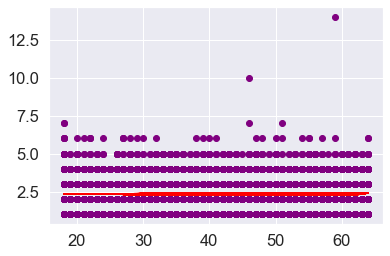

In [264]:
plt.scatter(x,y,color='purple')
plt.plot(x,y_pred, color='red')

# RESULTS

# The Accuracy Score of LGM(Linear Regression Model) is 1.0

# The Accuracy Score of RF(Random Forest) is 1.0

# The Accuracy Scoreof DT(Decision tree) is 1.0

# The Accuracy Scoreof  PR(Polynomial Regression) is  0.705076

# The Accuracy Scoreof LGM(Logistic Regression Model is 0.678025

# The Accuracy Score of SVM(Support Vector Machine) is 0.672203

# Submitted by :
   # RANJITH N [1VA19CS041]
   # MONICA P [1EW20IS048]
   # PUSHPA B M [1ME18CS048]
   # VARSHITHA S [1HK19CS177]